In [1]:
import pandas as pd
import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
# INPUTS:

# data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/"
data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/"

training_data_name = "tiling"

data_name = "yeast_chrV_1bpresolution_subsequence50" # csv

data_file_type = ".csv"

sequence_column_name = "sequence"

In [4]:
cn_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv")

In [5]:
# genome_df_chrV = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_smoothC0.csv")
genome_df_chrV = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_smoothC0_10_11.csv")

In [6]:
genome_df_chrV = pd.concat([genome_df_chrV, cn_avg_pred_df], axis=1)

In [7]:
genome_df_chrV

,sequence,chrID,position,smooth_C26,smooth_C29,smooth_C31,smooth_C26_rev_comp,smooth_C29_rev_comp,smooth_C31_rev_comp,smoothC0,...,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,C0
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,-0.368169,-0.418247,-0.416519
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,-0.284141,-0.262650,-0.355435
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,-0.382669,-0.338941,-0.395895
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,-0.471041,-0.345032,-0.396418
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,-0.157121,0.043354,-0.467565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,1.507879,0.331652,1.069545
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,0.975800,-0.319321,1.412484
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,-0.089022,-0.478377,0.957592
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,-0.923980,-0.117385,0.631284


In [8]:
genome_df_chrV["n=26"].values

array([-0.45334682, -0.27982089, -0.34260631, ...,  0.69138762,
        0.06789631, -0.92845294])

In [9]:
import scipy
scipy.fft.fft(genome_df_chrV["n=26"].values)[:5]

array([-114.67102233   -0.j        , 3660.84983214-1953.77370557j,
       2774.42472473+1797.59104504j, -828.34832035 +618.81920282j,
       4915.57415604+2602.27503965j])

In [10]:
region_size_list = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

C26_power_df = pd.DataFrame(columns=region_size_list)
C29_power_df = pd.DataFrame(columns=region_size_list)
C31_power_df = pd.DataFrame(columns=region_size_list)

for i in range(genome_df_chrV.shape[0]-region_size_list[-1]):
    for region_size in region_size_list:
        cur_region_df = genome_df_chrV.loc[i:(i+region_size),]

        C26_power_df.loc[i,region_size] = (np.abs(scipy.fft.fft(cur_region_df["n=26"].values))**2)[10]
        C29_power_df.loc[i,region_size] = (np.abs(scipy.fft.fft(cur_region_df["n=29"].values))**2)[10]
        C31_power_df.loc[i,region_size] = (np.abs(scipy.fft.fft(cur_region_df["n=31"].values))**2)[10]
    
        # C26_10_4_power_list.append((np.abs(scipy.fft.fft(cur_region_df["n=26"].values))**2)[10])    

KeyboardInterrupt: 

In [11]:
# starting_point=0
starting_point=0

In [12]:
C26_dominant_periods = []
C29_dominant_periods = []
C31_dominant_periods = []

N=104

# for starting_point in range(0,genome_df_chrV.shape[0], 201):
for starting_point in range(0,genome_df_chrV.shape[0]-N, 7):

    # Compute the FFT
    # N = genome_df_chrV.shape[0]
    # N = 10000

    yf_C26 = scipy.fft.fft(genome_df_chrV.loc[starting_point:(starting_point+N),"n=26"].values)
    yf_C29 = scipy.fft.fft(genome_df_chrV.loc[starting_point:(starting_point+N),"n=29"].values)
    yf_C31 = scipy.fft.fft(genome_df_chrV.loc[starting_point:(starting_point+N),"n=31"].values)
    xf = scipy.fft.fftfreq(N, 1)[:N//2]  # Frequency bins
    xp = 1/xf

    alpha_val=1

    # Plot the FFT results
    # plt.plot(xp, 2.0/N * np.abs(yf_C26[:N//2]), color="C0",alpha=0.3)
    # plt.plot(xp, 2.0/N * np.abs(yf_C29[:N//2]), color="C1",alpha=0.3)
    # plt.plot(xp, 2.0/N * np.abs(yf_C31[:N//2]), color="C2",alpha=0.3)

    # plt.plot(xp, np.abs(yf_C26[:N//2])**2, color="C0",alpha=0.3)
    # plt.plot(xp, np.abs(yf_C29[:N//2])**2, color="C1",alpha=0.3)
    # plt.plot(xp, np.abs(yf_C31[:N//2])**2, color="C2",alpha=0.3)

    # plt.plot(xf, 2.0/N * np.abs(yf_C26[:N//2]), color="C0",alpha=alpha_val)
    # plt.plot(xf, 2.0/N * np.abs(yf_C29[:N//2]), color="C1",alpha=alpha_val)
    # plt.plot(xf, 2.0/N * np.abs(yf_C31[:N//2]), color="C2",alpha=alpha_val)
    # plt.grid()
    # plt.xlabel('Frequency')
    # plt.ylabel('Magnitude')
    # plt.vlines(1/11, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # # plt.vlines(1/10.9, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # plt.vlines(1/10.8, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # # plt.vlines(1/10.7, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # plt.vlines(10.6, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.3)
    # plt.vlines(10.5, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.3)
    # plt.vlines(10.4, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.3)
    # # plt.vlines(1/10.3, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # plt.vlines(1/10.2, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # # plt.vlines(1/10.1, 0, max(2.0/N * np.abs(yf_C26[:N//2])), color="C3",alpha=0.1)
    # plt.xlim((10,11))
    # plt.xlim((1/11, 1/10))
    # plt.show()


    # Filter out frequencies below 0.5
    freq_threshold = 0.05
    valid_indices = xf > freq_threshold

    # Identify the dominant frequency above 0.5 for each variable
    dominant_freq_idx_C26 = np.argmax(np.abs(yf_C26[:len(xf)][valid_indices]))
    dominant_freq_idx_C29 = np.argmax(np.abs(yf_C29[:len(xf)][valid_indices]))
    dominant_freq_idx_C31 = np.argmax(np.abs(yf_C31[:len(xf)][valid_indices]))

    dominant_freq_C26 = xf[valid_indices][dominant_freq_idx_C26]
    dominant_freq_C29 = xf[valid_indices][dominant_freq_idx_C29]
    dominant_freq_C31 = xf[valid_indices][dominant_freq_idx_C31]

    dominant_period_C26 = 1/dominant_freq_C26
    dominant_period_C29 = 1/dominant_freq_C29
    dominant_period_C31 = 1/dominant_freq_C31

    C26_dominant_periods.append(dominant_period_C26)
    C29_dominant_periods.append(dominant_period_C29)
    C31_dominant_periods.append(dominant_period_C31)

    if (dominant_period_C26 == dominant_period_C29) and (dominant_period_C26 == dominant_period_C31):
        print(dominant_period_C26)
        # Extract phase at the dominant frequency
        phaseC26 = np.angle(yf_C26[:len(xf)][valid_indices][dominant_freq_idx_C26])
        phaseC29 = np.angle(yf_C29[:len(xf)][valid_indices][dominant_freq_idx_C26])
        phaseC31 = np.angle(yf_C31[:len(xf)][valid_indices][dominant_freq_idx_C26])

        # Calculate phase differences
        phase_diff_26_29 = np.angle(np.exp(1j * (phaseC29 - phaseC26)))
        phase_diff_26_31 = np.angle(np.exp(1j * (phaseC31 - phaseC26)))
        phase_diff_29_31 = np.angle(np.exp(1j * (phaseC31 - phaseC29)))

        # print(phase_diff_26_29, phase_diff_26_31, phase_diff_29_31)
        # print(phase_diff_26_29%(2*np.pi), phase_diff_26_31%(2*np.pi), phase_diff_29_31%(2*np.pi))
        print("\t", phase_diff_26_29%(2*np.pi)/(2*np.pi), phase_diff_26_31%(2*np.pi)/(2*np.pi), phase_diff_29_31%(2*np.pi)/(2*np.pi))
        print("\t", phase_diff_26_29%(2*np.pi)/(2*np.pi)*dominant_period_C26, phase_diff_26_31%(2*np.pi)/(2*np.pi)*dominant_period_C26, phase_diff_29_31%(2*np.pi)/(2*np.pi)*dominant_period_C26)
        # print((phase_diff_26_29*dominant_period_C26)%dominant_period_C26, (phase_diff_26_31*dominant_period_C26)%dominant_period_C26, (phase_diff_29_31*dominant_period_C26)%dominant_period_C26)
        # print((phase_diff_26_29+2*np.pi)/(2*np.pi), (phase_diff_26_31+2*np.pi)/(2*np.pi), (phase_diff_29_31*dominant_period_C26)%dominant_period_C26)

    # Extract dominant frequency
    # idx = np.argmax(2.0/N * np.abs(yf_C26[:N//2]))
    # dominant_freq = xf[idx]
    # dominant_period = 1 / dominant_freq
    # print(f'Dominant frequency (C26): {dominant_freq_C26} Hz')
    # print(f'Dominant frequency (C29): {dominant_freq_C29} Hz')
    # print(f'Dominant frequency (C31): {dominant_freq_C31} Hz')
    # print(f'Dominant period (C26): {dominant_period_C26} units')
    # print(f'Dominant period (C29): {dominant_period_C29} units')
    # print(f'Dominant period (C31): {dominant_period_C31} units')

    # Candidate periods
    candidate_periods = [10, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11]

    # Find the best candidate period
    # np.argmax([(2.0/N * np.abs(yf_C26[:N//2]))][])
    closest_period = min(candidate_periods, key=lambda p: abs(p - dominant_period))

    # print(f'Closest candidate period: {closest_period}')
    # starting_point += 500

10.399999999999999
	 0.7036066996419633 0.5363457744654296 0.8327390748234664
	 7.317509676276417 5.577996054440468 8.66048637816405


/var/folders/_4/m5twwlnn26b0q41jgwd5jnz80000gq/T/ipykernel_98111/3125807020.py:18: RuntimeWarning: divide by zero encountered in divide
  xp = 1/xf


NameError: name 'dominant_period' is not defined

In [13]:
np.mean(C26_dominant_periods), np.mean(C29_dominant_periods), np.mean(C31_dominant_periods)

(10.399999999999999, 10.399999999999999, 10.399999999999999)

In [14]:
np.mean([np.mean(C26_dominant_periods), np.mean(C29_dominant_periods), np.mean(C31_dominant_periods)])

10.399999999999999

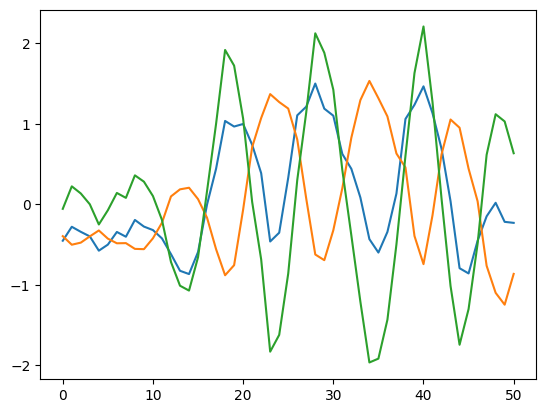

In [15]:
plt.plot(genome_df_chrV.loc[0:50,"n=26"])
plt.plot(genome_df_chrV.loc[0:50,"n=31"])
plt.plot(genome_df_chrV.loc[0:50,"n=26"] - genome_df_chrV.loc[0:50,"n=31"])

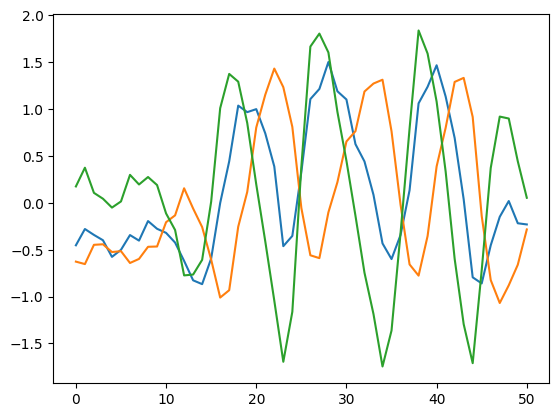

In [16]:
plt.plot(genome_df_chrV.loc[0:50,"n=26"])
plt.plot(genome_df_chrV.loc[0:50,"n=29"])
plt.plot(genome_df_chrV.loc[0:50,"n=26"] - genome_df_chrV.loc[0:50,"n=29"])

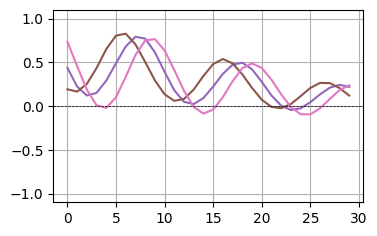

In [19]:
# plt.figure(figsize=(4, 2))
plt.figure(figsize=(4, 2.5))
plt.plot(sm.tsa.ccf(genome_df_chrV["n=26"], genome_df_chrV["n=29"], nlags=30), 
         linestyle='-', label="C26 and C29", color="C4")
plt.plot(sm.tsa.ccf(genome_df_chrV["n=26"], genome_df_chrV["n=31"], nlags=30), 
         linestyle='-', label="C26 and C31", color="C5")
plt.plot(sm.tsa.ccf(genome_df_chrV["n=29"], genome_df_chrV["n=31"], nlags=30), 
         linestyle='-', label="C29 and C31", color="C6")
         
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=26_rev_comp"], genome_df_chrV["n=29_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C26 and C29 Reverse Complements", color="C4")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=26_rev_comp"], genome_df_chrV["n=31_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C26 and C31 Reverse Complements", color="C5")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=29_rev_comp"], genome_df_chrV["n=31_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C29 and C31 Reverse Complements", color="C6")

# plt.plot(sm.tsa.ccf(genome_df_chrV["n=29_rev_comp"], genome_df_chrV["n=26_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C29 and C26 Reverse Complements", color="C4")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=31_rev_comp"], genome_df_chrV["n=26_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C31 and C26 Reverse Complements", color="C5")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=31_rev_comp"], genome_df_chrV["n=29_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C31 and C29 Reverse Complements", color="C6")

# plt.plot(sm.tsa.ccf(genome_df_chrV["n=26"], genome_df_chrV["n=26_rev_comp"], nlags=30),
#          linestyle='dashdot', label="C26 and C26 Reverse Complement", color="C0")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=29"], genome_df_chrV["n=29_rev_comp"], nlags=30),
#          linestyle='dashdot', label="C29 and C29 Reverse Complement", color="C1")
# plt.plot(sm.tsa.ccf(genome_df_chrV["n=31"], genome_df_chrV["n=31_rev_comp"], nlags=30),
#          linestyle='dashdot', label="C31 and C31 Reverse Complement", color="C2")

plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
# plt.title('Cross Correlation Functions, ChrV')
# plt.legend(fontsize="small")
# plt.xlabel('Lag')
# plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.ylim(-1.1, 1.1)
plt.show()
# plt.plot(sm.tsa.acf(smooth_cn_df["detrended_smooth_3bp_C26"][range(1, smooth_cn_df.shape[0]-1)], nlags=30), 
#          marker='o', linestyle='-', label="Predicted C26", alpha=alpha_val)

/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


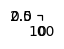

<Figure size 1400x200 with 0 Axes>

In [ ]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C0")
line2, = ax.plot(x,y, color="C1")
line3, = ax.plot(x,y, color="C2")
line4, = ax.plot(x,y, color="C4")
line5, = ax.plot(x,y, color="C5")
line6, = ax.plot(x,y, color="C6")
# line7, = ax.plot(x,y, color="C7", linestyle="dashdot")
# line8, = ax.plot(x,y, color="white")
# line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
# line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
# legendFig.legend([line1, line4, line2, line5, line3, line6], 
#                  ["C26", "C26 Reverse Complement",
#                   "C29", "C29 Reverse Complement",
#                   "C31", "C31 Reverse Complement"], ncol=3)
legendFig.legend([line1, line2, line3, line4, line5, line6], 
                 ["C26", "C29", "C31", "C26, C29", "C26, C31", "C29, C31"], ncols=2)
legendFig.set_figheight(2)
legendFig.set_figwidth(14)
legendFig.savefig('legend.png')

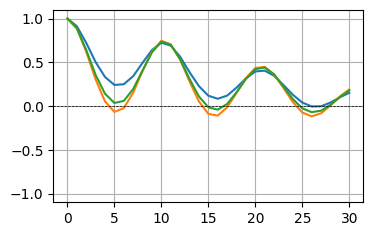

In [20]:
# plt.figure(figsize=(4, 2))
plt.figure(figsize=(4, 2.5))
plt.plot(sm.tsa.acf(genome_df_chrV["n=26"], nlags=30), 
         linestyle='-', label="C26", color="C0")
plt.plot(sm.tsa.acf(genome_df_chrV["n=29"], nlags=30), 
         linestyle='-', label="C29", color="C1")
plt.plot(sm.tsa.acf(genome_df_chrV["n=31"], nlags=30), 
         linestyle='-', label="C31", color="C2")

# plt.plot(sm.tsa.acf(genome_df_chrV["n=26_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C26 Reverse Complement", color="C0")
# plt.plot(sm.tsa.acf(genome_df_chrV["n=29_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C29 Reverse Complement", color="C1")
# plt.plot(sm.tsa.acf(genome_df_chrV["n=31_rev_comp"], nlags=30), 
#          linestyle='dashed', label="C31 Reverse Complement", color="C2")


plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
# plt.title('Cross Correlation Functions, ChrV')
# plt.legend(fontsize="small")
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-1.1, 1.1)
plt.show()
# plt.plot(sm.tsa.acf(smooth_cn_df["detrended_smooth_3bp_C26"][range(1, smooth_cn_df.shape[0]-1)], nlags=30), 
#          marker='o', linestyle='-', label="Predicted C26", alpha=alpha_val)

In [ ]:
genome_df_chrV

,sequence,chrID,position,smooth_C26,smooth_C29,smooth_C31,smooth_C26_rev_comp,smooth_C29_rev_comp,smooth_C31_rev_comp,smoothC0,...,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,C0
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,-0.368169,-0.418247,-0.416519
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,-0.284141,-0.262650,-0.355435
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,-0.382669,-0.338941,-0.395895
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,-0.471041,-0.345032,-0.396418
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,-0.157121,0.043354,-0.467565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,1.507879,0.331652,1.069545
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,0.975800,-0.319321,1.412484
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,-0.089022,-0.478377,0.957592
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,-0.923980,-0.117385,0.631284
